In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.image import imread


In [ ]:

n = 1000
p = 200
theta = np.random.randn(p,n)
y = np.random.randn(p)

def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type':'eq','fun': lambda x: theta @ x - y})
x0 = np.linalg.pinv(theta) @ y
res = minimize(L1_norm,x0,method='SLSQP',constraints=constr)
s_L1 = res.x
s_L2 = np.linalg.pinv(theta) @ y


10.127286911203617


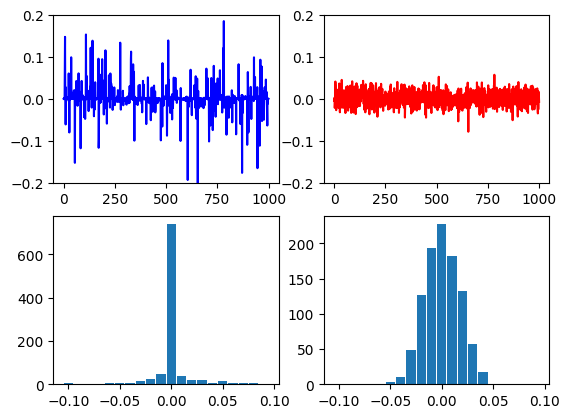

In [6]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1,color='b',linewidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2,color='r',linewidth=1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[3].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

plt.show()

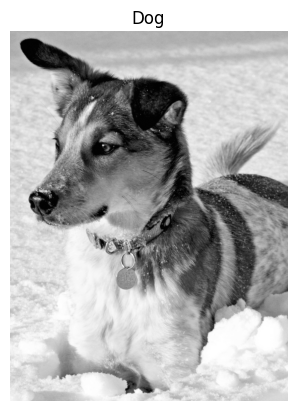

In [ ]:

# -----------------------------
# STEP 1: Load and grayscale
# -----------------------------
img = imread("DATA/dog.jpg")

gray = np.mean(img, axis= -1)
plt.imshow(gray,cmap='gray')
plt.title("Dog")
plt.axis('off')
plt.grid()
plt.show()


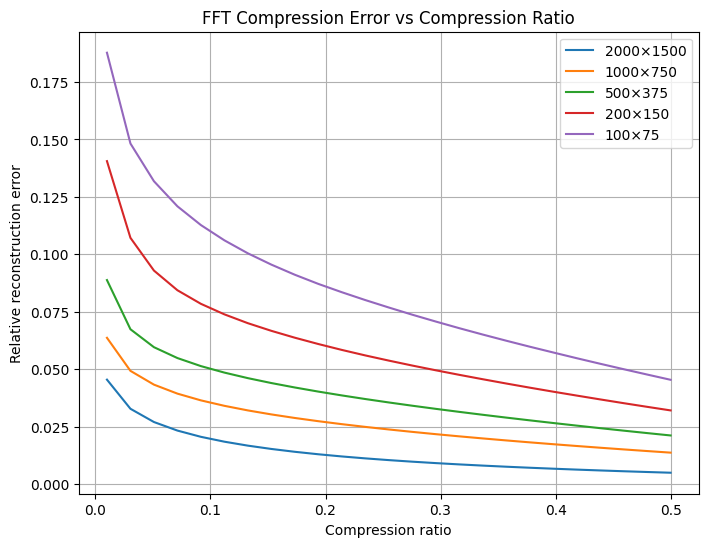

In [27]:
def downsample_image(image, target_shape):
    H, W = image.shape
    h, w = target_shape

    row_step = H // h
    col_step = W // w

    downsampled = image[::row_step, ::col_step]

    return downsampled[:h, :w]

def fft_compress(image, keep_ratio):
    F = np.fft.fftshift(np.fft.fft2(image))
    magnitude = np.abs(F)

    magnitude_sorted = np.sort(magnitude.flatten())
    N = magnitude_sorted.size
    cutoff_index = int((1 - keep_ratio) * N)
    threshold = magnitude_sorted[cutoff_index]

    F_compressed = F * (magnitude >= threshold)

    img_recon = np.real(np.fft.ifft2(np.fft.ifftshift(F_compressed)))
    return img_recon

def reconstruction_error(original, reconstructed):
    # TODO 5:
    # Implement relative Frobenius norm error
    error = np.linalg.norm(original - reconstructed) / np.linalg.norm(original)
    return error

# -----------------------------
# STEP 5: Experiment loop
# -----------------------------
resolutions = [
    (2000, 1500),
    (1000, 750),
    (500, 375),
    (200, 150),
    (100, 75)
]

compression_ratios = np.linspace(0.01, 0.5, 25)

plt.figure(figsize=(8,6))

for res in resolutions:
    img_ds = downsample_image(gray, res)
    errors = []

    for r in compression_ratios:
        img_rec = fft_compress(img_ds, r)
        err = reconstruction_error(img_ds, img_rec)
        errors.append(err)

    plt.plot(compression_ratios, errors, label=f"{res[0]}×{res[1]}")

plt.xlabel("Compression ratio")
plt.ylabel("Relative reconstruction error")
plt.title("FFT Compression Error vs Compression Ratio")
plt.legend()
plt.grid(True)
plt.show()
